In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline

from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
# reading the youth model dataset 
youth_model = pd.read_csv("datasets/youth_model.csv")

youth_model.head()

,hmlsmorethan1Yr,dv_neglect,dv_physical,dv_physical_rel,dv_sexual_rel,subsabuse,drugabuse,SPA
0,1,1,1,1,0,0,0,4
1,1,0,0,0,1,0,0,4
2,1,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,4
4,0,0,0,0,0,0,0,4


In [3]:
youth_model.isnull().sum()

hmlsmorethan1Yr    0
dv_neglect         0
dv_physical        0
dv_physical_rel    0
dv_sexual_rel      0
subsabuse          0
drugabuse          0
SPA                0
dtype: int64

In [4]:
youth_model.dtypes

hmlsmorethan1Yr    int64
dv_neglect         int64
dv_physical        int64
dv_physical_rel    int64
dv_sexual_rel      int64
subsabuse          int64
drugabuse          int64
SPA                int64
dtype: object

In [5]:
print(youth_model.columns.tolist())

['hmlsmorethan1Yr', 'dv_neglect', 'dv_physical', 'dv_physical_rel', 'dv_sexual_rel', 'subsabuse', 'drugabuse', 'SPA']


# Train Test Split
______

80 percent goes to training
20 percent goes to testing
42 random test

Target Variable with SMOTE: hmlsmorethan1Yr

Features: dv_neglect, dv_physical, dv_physical_rel, dv_sexual_rel, subsabuse, drugabuse, SPA

In [6]:
# creating our X and y

features = ['dv_neglect', 'dv_physical', 'dv_physical_rel', 'dv_sexual_rel', 'subsabuse', 'drugabuse', 'SPA']

X = youth_model[features]
y = youth_model['hmlsmorethan1Yr']

In [7]:
# Train Test Split


X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.20,
                                                    random_state=42,
                                                    stratify=y)

In [8]:
# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [9]:
# Train a classifier (e.g., Random Forest) on the resampled data
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [10]:
clf.score(X_train_resampled, y_train_resampled)

0.6484085862324205

In [11]:
# Score model on test set.
clf.score(X_test, y_test)

0.5503875968992248

In [12]:
# Evaluate the classifier
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.59      0.63       338
           1       0.38      0.48      0.42       178

    accuracy                           0.55       516
   macro avg       0.53      0.53      0.53       516
weighted avg       0.58      0.55      0.56       516



In [13]:
importances = clf.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(feature_importance_df)

           Feature  Importance
6              SPA    0.403786
4        subsabuse    0.157347
0       dv_neglect    0.109780
5        drugabuse    0.103997
3    dv_sexual_rel    0.094820
2  dv_physical_rel    0.067504
1      dv_physical    0.062765


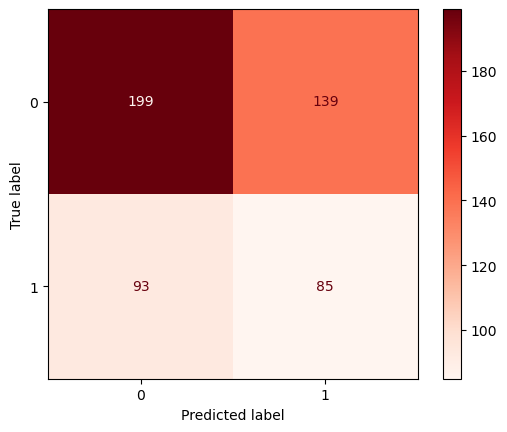

In [14]:
# Confusion Matrix Display with the SMOTE method
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, cmap = 'Reds');